In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text
from sklearn.decomposition import NMF
import numpy as np
import pickle
import warnings  
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

import nltk 
# from nltk.corpus import stopwords
from nltk import word_tokenize, pos_tag
# from nltk.stem import PorterStemmer
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\alber\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\alber\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
pd.set_option('max_colwidth', 1000)
pd.options.display.max_rows = 500
# Read file
df1 = pd.read_pickle('data_prep.pkl')

In [3]:
df1.head()

,consumer_complaint_narrative,Doc_Id,word_count,data_nouns,cleaned
190135,"Due to inconsistencies in the amount owed that I was told by M & T Bank and the amount that was reported to the credit reporting agencies, I was advised to write a good will letter in order to address the issue and request the negative entry be removed from my credit report all together. I had a vehicle that was stolen and it was declared a total loss by insurance company. The insurance company and the GAP insurancw companypaid the outstanding balance of the loan, but I was told by M & T Bank that there was still a balance due on the loan. In good faith, without having received any proof as to why there was still a balance, I made a partial payment towards the remaining debt. I then sent the goodwill letter still offering to pay the remainder of the debt, but in exchange for the removal of the negative entry on my credit report. At one point, in 2015, per my credit monitoring agency, it showed a delinquent balance of $0.00, but when I checked my credit report again on 2015, ther...",1,249,inconsistencies amount M T Bank amount credit reporting agencies letter order issue entry credit report vehicle loss insurance company insurance company GAP insurancw balance loan M T Bank balance loan faith proof balance payment debt goodwill letter remainder debt exchange removal entry credit report point credit monitoring agency balance credit report balance monies GAP insurance insurance company M T Bank M T Bank return mail courtesy response,inconsistency m t bank credit reporting agency letter order issue entry credit report vehicle loss insurance company insurance company gap insurancw balance loan m t bank balance loan faith proof balance payment debt goodwill letter remainder debt exchange removal entry credit report point credit monitoring agency balance credit report balance monies gap insurance insurance company m t bank m t bank return mail courtesy response
191998,"Around we consolidated our loans and paid off a loan to Chrysler financial for an automotive loan. In we applied for a lost title at our local town office in Tennessee. At this time it was made known to us that TD Financial lien on our title. I was directed to TD financial , then to My title Support , and back to TD financial to find that there is a "" balance due of $85.00 '' for "" charges and fees ''. I have NEVER received any notifications from , TD Auto Finance or any other representative in the TEN to TWELVE YEARS since that loan was paid off. TD Auto Finance is located in Maine and I have never transacted business with them. I requested a supervisor call me to discuss the "" balance due '' on 15, and 1 week has passed with no response despite the calls I have placed to their "" customer service department '' I find it very concerning and unethical that a corporation can quietly hold a "" balance due '' for more than 10 years and then demand a consumer pay. \n",35,201,loans loan Chrysler loan title town office Tennessee time TD Financial lien title TD My title Support TD balance charges fees NEVER notifications TD Auto Finance representative TEN TWELVE YEARS loan TD Auto Finance Maine business supervisor call balance week response calls customer service department corporation balance years consumer pay,loan loan chrysler loan title town office tennessee time td financial lien title td title support td balance charge fee notification td auto finance representative year loan td auto finance maine business supervisor balance week response call customer service department corporation balance year consumer pay
192083,"I was offered a trial modification by my servicer - Carrington. I accepted the offer. The first payment was due in the month of . As a member of the , I received 30 day in the month of . None-the-less I called Carrington to make the trial modification payment over the phone. Carrington refused to take the payment over the phone but instead demanded that I send via . Because of my

In [4]:
# let us see the top 20 again after cleaning
freq_NN = pd.Series(' '.join(df1['cleaned']).split()).value_counts()[:20]
freq_NN

credit         11995
account        11059
payment         9262
loan            6938
bank            5864
time            5252
debt            4705
card            4575
report          4433
company         4350
mortgage        4246
information     3939
month           3773
letter          3508
day             3504
year            3423
number          3203
fee             2807
phone           2708
collection      2684
dtype: int64

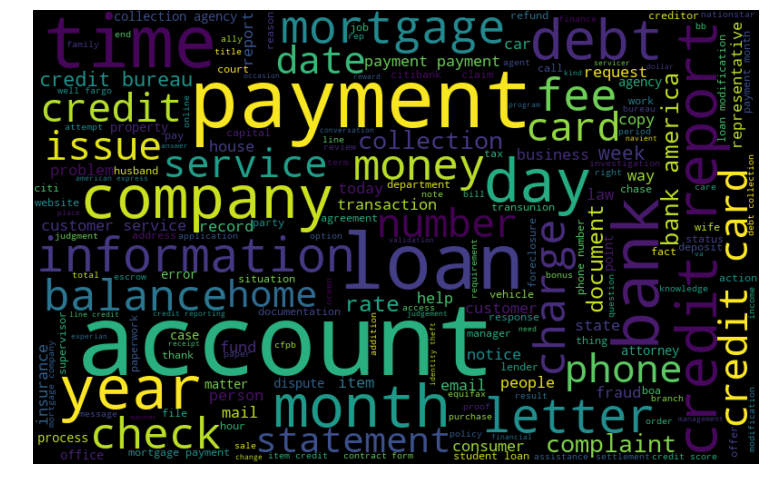

In [5]:
#Wordcloud

from wordcloud import WordCloud 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(str(df1['cleaned'])) 
plt.figure(1,figsize=(13, 10))
fig=plt.figure(1)
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()
fig.savefig('wordcloud')

In [6]:
#Use CountVectorizer to get bigrams to visualize
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_df = 0.95, min_df = 2, stop_words= 'english', max_features=10000, ngram_range=(1,3))
X = cv.fit_transform(df1['cleaned'])

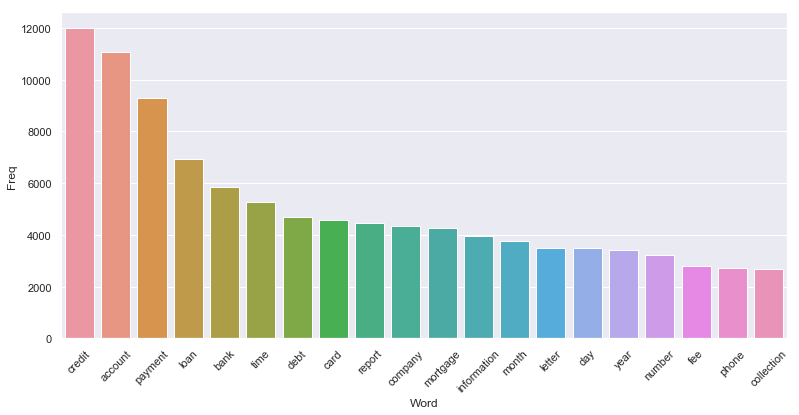

In [7]:
# Most frequently occuring words
def get_top_n_words(corpus,n=None):
    vec = CountVectorizer().fit(df1['cleaned'])
    bag_of_words=vec.transform(df1['cleaned'])
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word , idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
# Convert most freq words to datafame for visuals

top_words = get_top_n_words(df1['cleaned'], n=20)
top_df = pd.DataFrame(top_words)
top_df.columns = ['Word', 'Freq']

# barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,6)})
g = sns.barplot(x='Word', y='Freq', data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=45)
fig = g.get_figure()
fig.savefig("sns_output.png")

               Bi-gram  Freq
0        credit report  2620
1          credit card  1838
2          wells fargo   986
3         bank america   898
4     customer service   727
5    collection agency   704
6       credit bureaus   650
7     credit reporting   637
8         bank account   527
9         credit score   496
10   loan modification   477
11     account account   473
12      account credit   460
13        phone number   438
14       interest rate   428
15    mortgage company   409
16       report credit   407
17      credit reports   383
18  information credit   382
19     debt collection   367


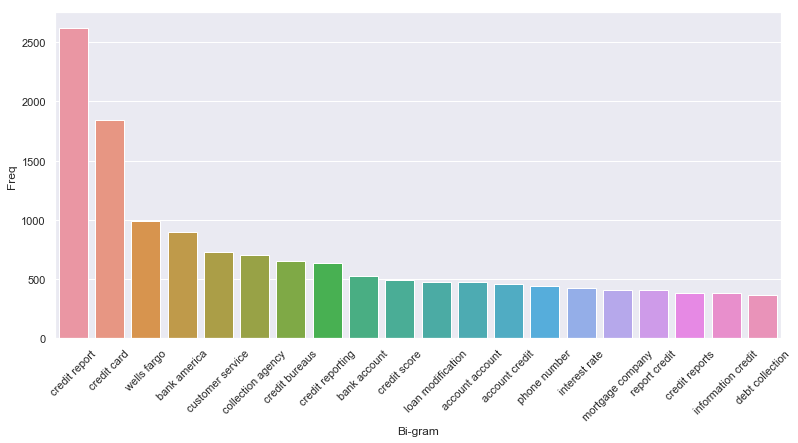

In [8]:
# Most frequently Co-occuring words
def get_top_n2_words(corpus,n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),max_features=2000).fit(df1['data_nouns'])
    bag_of_words=vec1.transform(df1['data_nouns'])
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word , idx in vec1.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
# Convert most freq words to datafame for visuals

top2_words = get_top_n2_words(df1['data_nouns'], n=20)
top2_df = pd.DataFrame(top2_words)
top2_df.columns = ['Bi-gram', 'Freq']

# for bigram wordcloud
top100_words = get_top_n2_words(df1['data_nouns'], n=100)
top100_df = pd.DataFrame(top100_words)
top100_df.columns = ['Bi-gram', 'Freq']
print(top2_df)

# barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,6)})
h = sns.barplot(x='Bi-gram', y='Freq', data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)
fig = h.get_figure()
fig.savefig("sns_output_bigrams.png")

In [9]:
top100_df.head()

,Bi-gram,Freq
0,credit report,2620
1,credit card,1838
2,wells fargo,986
3,bank america,898
4,customer service,727


In [10]:
top100_df['Bi_gram'] = top100_df['Bi-gram'].str.replace(' ','_')
top100_df.head()

,Bi-gram,Freq,Bi_gram
0,credit report,2620,credit_report
1,credit card,1838,credit_card
2,wells fargo,986,wells_fargo
3,bank america,898,bank_america
4,customer service,727,customer_service


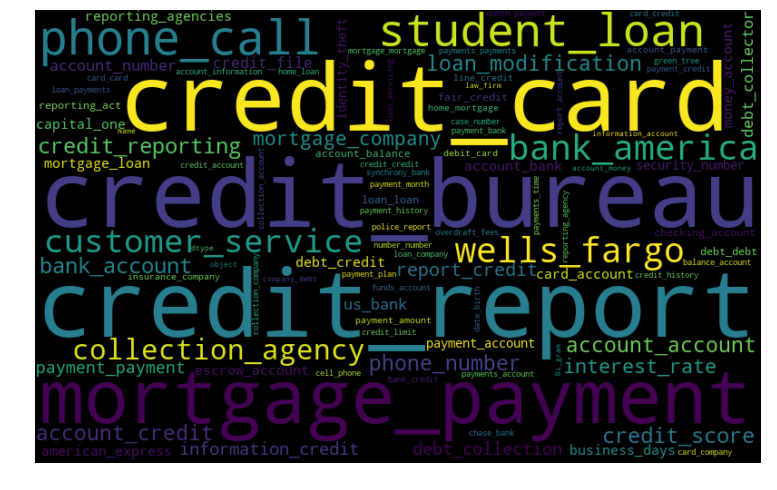

In [11]:
from wordcloud import WordCloud 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(str(top100_df['Bi_gram'])) 
plt.figure(1,figsize=(13, 10))
fig=plt.figure(1)
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()
fig.savefig('wordcloud_bigram')

In [12]:
no_features = 10000

# Term vectorization term weighting:
- The usefulness of the document-term matrix can be improved by assigning higher weights to important terms. This helps to include or exclude terms that will enter the model.
- TF-IDF is a common way of giving weights to terms in a document.
- Term Frequency - TF is the number of times a term appears in a document.
- Inverse Document Frequency - IDF is the total number of documents that have a term. This penalises common terms that appear in almost every document.

In [13]:
tfidf_vectorizer = TfidfVectorizer(max_df = 0.95, min_df = 2, stop_words= 'english', max_features=no_features, ngram_range=(1,1),
                                  analyzer='word')
tfidf = tfidf_vectorizer.fit_transform(df1['cleaned'])
# get the feature names
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

In [14]:
print('Vocabulary has %d distinct terms' % len(tfidf_feature_names))

Vocabulary has 4839 distinct terms


The terms with the highest TF-IDF scores across all documents in the document-term matrix.

In [15]:
import operator
def rank_terms( tfidf, tfidf_feature_names ):
    # get the sums over each column
    sums = tfidf.sum(axis=0)
    # map weights to the terms
    weights = {}
    for col, term in enumerate(tfidf_feature_names):
        weights[term] = sums[0,col]
    # rank the terms by their weight over all documents
    return sorted(weights.items(), key=operator.itemgetter(1), reverse=True)

In [16]:
ranking = rank_terms(tfidf, tfidf_feature_names)
for i, pair in enumerate( ranking[0:20] ):
    print( "%02d. %s (%.0f)" % ( i+1, pair[0], pair[1] ) )

01. credit (527)
02. account (497)
03. payment (472)
04. loan (375)
05. bank (318)
06. debt (313)
07. card (288)
08. report (281)
09. mortgage (263)
10. time (259)
11. company (254)
12. month (228)
13. information (227)
14. letter (217)
15. number (210)
16. day (210)
17. year (205)
18. fee (203)
19. collection (199)
20. phone (186)


# NMF model fitting. 

In [17]:
no_topics = 40

In [18]:
nmf=NMF(n_components = no_topics, random_state =1, alpha=0.1, l1_ratio = 0.5, init= 'nndsvd').fit(tfidf)

In [19]:
def display_topics(model, feature_names, no_top_words):
    col1 = 'topic'
    col2 = 'top_ten_words'
    dct = {col1: [], col2: []}
    for topic_idx, topic in enumerate(model.components_):
        dct[col1].append(str(topic_idx))
        dct[col2].append(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
    return pd.DataFrame.from_dict(dct)

In [20]:
no_top_words = 10
topic_word = display_topics(nmf, tfidf_feature_names, no_top_words)
topic_word

,topic,top_ten_words
0,0,credit report bureau score reporting item dispute history experian transunion
1,1,payment time arrangement history day plan principal pay issue phone
2,2,fund transaction debit overdraft bank transfer account rushcard business bb
3,3,debt collector validation court creditor law recovery collection proof fdcpa
4,4,bank america boa td synchrony fraud branch action reason application
5,5,card credit purchase citi limit debit citibank store reward fraud
6,6,account checking status access activity bank saving result department issue
7,7,loan student navient school lender repayment college income education signer
8,8,number phone message person work address security time cell caller
9,9,inquiry credit right view authorization validity privacy breach birth section


In [21]:
no_top_words = 3
topic_word_3 = display_topics(nmf, tfidf_feature_names, no_top_words)
topic_word_3['Theme'] = topic_word_3.top_ten_words.str.title()
topic_word_4 = topic_word_3.loc[:,['topic', 'Theme']]
topic_word_4

,topic,Theme
0,0,Credit Report Bureau
1,1,Payment Time Arrangement
2,2,Fund Transaction Debit
3,3,Debt Collector Validation
4,4,Bank America Boa
5,5,Card Credit Purchase
6,6,Account Checking Status
7,7,Loan Student Navient
8,8,Number Phone Message
9,9,Inquiry Credit Right


In [22]:
# Merge the theme with the top_ten
topic_word = pd.merge(topic_word_4, topic_word, on ='topic')
topic_word

,topic,Theme,top_ten_words
0,0,Credit Report Bureau,credit report bureau score reporting item dispute history experian transunion
1,1,Payment Time Arrangement,payment time arrangement history day plan principal pay issue phone
2,2,Fund Transaction Debit,fund transaction debit overdraft bank transfer account rushcard business bb
3,3,Debt Collector Validation,debt collector validation court creditor law recovery collection proof fdcpa
4,4,Bank America Boa,bank america boa td synchrony fraud branch action reason application
5,5,Card Credit Purchase,card credit purchase citi limit debit citibank store reward fraud
6,6,Account Checking Status,account checking status access activity bank saving result department issue
7,7,Loan Student Navient,loan student navient school lender repayment college income education signer
8,8,Number Phone Message,number phone message person work address security time cell caller
9,9,Inquiry Credit Right,inquiry credit right view authorization validity privacy breach birth section


In [23]:
nmf_W = nmf.transform(tfidf)
nmf_H = nmf.components_

In [24]:
df2 = pd.DataFrame({'topic': nmf_W.argmax(axis=1),
                   'Doc_Id': df1['Doc_Id'],
                   'consumer_complaint_narrative': df1['consumer_complaint_narrative']},
                  columns = ['topic', 'Doc_Id', 'consumer_complaint_narrative'])

In [25]:
def showdocs(df2, topics, nshow=5 ): # nshow= len(df1)
    idx = df2.topic == topics[0]
    for i in range(1, len(topics)):
        idx = idx | (df2.topic == topics[i])
    return df2[idx].groupby('topic').head(nshow).sort_values('topic')

In [26]:
numbers = tuple(list(range(0, no_topics)))

In [27]:
final = showdocs(df2, numbers)
final.head(10)

,topic,Doc_Id,consumer_complaint_narrative
202726,0,836,"I have been separated from since the beginning of 2014 living with my grand farther in and never gave anyone permission to sign my name and to commit fraud on my credit. She has signed my name and gave my social security no. to approximately credit card agencies maxing them out due to looking at my credit report. I have never went back to since I left in the beginning of 2014. \nBelow are she committed fraud and signed my name ( copied from credit report ). \nPlease help me clear up all these credit cards she has committed fraud by using my social security and signing my name and do what you can to prosecute her to the fullest extent of the law.. \nAlso she is on probation which should make fraud immediate. Below is her probation office number and name. \n : Probation office number, Name : or . \n\n\n\n # , ( ) Date Balance : $ # ( ) : Individual AccountAccount Type : Revolving AccountLoan Type : CHARGE ACCOUNTBalance : $ Received : $ 0High Balance ..."
202913,0,885,"I am a father struggling to correct my credit profile. I recently paid accounts in collections, and opened new credit card accounts for the time in years. My credit was that bad. Experian and worked with me and helped out huge, from deleting items that were not supposed to be on my reports, to getting back to me in a more than timely manner on other matters. EQUIFA on the other hand, is doing the opposite. I 'm trying to remove a credit inquiry that inquired on me ( in days ), and since they are the same type and close in date, they should be deleted. Only EQUIFA REFUSED TO DO SO. The other agencies did it on the phone, right then and there with a single additional question. They knew it should n't of been there. EQUIFA, who I have called times in 2 weeks, speaking with people, say they are not removing it. This is absurd. How are these people in charge of our credit scores and reports??? I really need help with this, and little as it may sound to some, it is important..."
197367,0,246,"Hello, mortgage : in dispute : report # , I contacted Experian to dispute a delinquent payment on my credit report. I was advised the mortgage company had to correct the late pay and resubmit to the credit bureau. I sent my mortgage company a copy of my postal tracking # It was mailed as a 2 day priority. \nAs of today, this is STILL showing delinquent on the credit reports. Per Experian, they closed my dispute in hours, referred me to my mortgage company and to date, have not corrected or removed my late payment as an error or acknowledged as such. \nEACH late pay cost me points on my credit report. For them to force a lower score on me is questionable and unethical. It appears that they use "" late pays '' as a means to force people to purchase their credit products. \nToday, I contacted my mortgage company yet Again and was advised the is showing current in their system. \nPlease advise. Thank you for your time. \n*******************IF you choose to publish this, PLEASE..."
203550,0,1107,"has listed on my credit report a debt that was abolished by Mariner Finance in 2013. This was a joint account as I co-signed for a coworker to purchase a used car but Mariner Finance has been listing account as an individual account. Mariner Finance agreed to relieve me of all financial obligation, garnishments, and prompt deletion of credit entries in exchange for a one-time payment of $3000.00. The payment was immediately rendered and the stipulations were signed by a judge of the County District Court that same month. keeps verifying the debt as valid because Mariner Finance is supplying fictitious information because collection efforts remain in effect for second party on account. County District Court has assured me that they do not verify debts, make entries to credit reports or make deletions. County District Court has assured me that they do not verify debts, make entries to credit reports or make deletions. credit bureau is also 

In [28]:
# save for use later
final.to_pickle('model.pkl')

In [29]:
topic_word.to_pickle('topic_word.pkl')